# 1. Getting Started: Airbnb Copenhagen

This assignment deals with the most recent Airbnb listings in Copenhagen. The data is collected from [Inside Airbnb](http://insideairbnb.com/copenhagen). Feel free to explore the website further in order to better understand the data. The data (*listings.csv*) has been collected as raw data and needs to be preprocessed.

**Hand-in:** Hand in as a group in Itslearning in a **single**, well-organized and easy-to-read Jupyter Notebook. Please just use this notebook to complete the assignment.

If your group consists of students from different classes, upload in **both** classes.

The first cell does some preprocessing. Please just run these cells and do not change anything. The assignment starts below. Make sure that listings.csv' is in the same folder as this notebook




<>:55: SyntaxWarning: invalid escape sequence '\$'
<>:55: SyntaxWarning: invalid escape sequence '\$'
/tmp/ipykernel_22331/1842324635.py:55: SyntaxWarning: invalid escape sequence '\$'
  data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)


,id,name,host_id,host_name,neighbourhood_cleansed,latitude,longitude,room_type,price,minimum_nights,...,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,calculated_host_listings_count,availability_365,price_category
0,6983,Copenhagen 'N Livin',16774,Simon,Nørrebro,55.686410,12.547410,Entire home/apt,898.0,3,...,4.79,4.78,4.86,4.89,4.73,4.71,1.08,1,0,0
1,26057,Lovely house - most attractive area,109777,Kari,Indre By,55.693070,12.576490,Entire home/apt,2600.0,4,...,4.93,4.96,4.93,4.86,4.94,4.81,0.55,1,303,1
2,26473,City Centre Townhouse Sleeps 1-10 persons,112210,Julia,Indre By,55.676020,12.575400,Entire home/apt,3250.0,3,...,4.63,4.44,4.78,4.70,4.89,4.59,2.06,3,56,1
3,29118,Best Location in Cool Istedgade,125230,Nana,Vesterbro-Kongens Enghave,55.670230,12.555040,Entire home/apt,725.0,7,...,4.87,4.73,5.00,5.00,4.87,4.80,0.16,1,59,0
4,31094,"Beautiful, spacious, central, renovated Penthouse",129976,Ebbe,Vesterbro-Kongens Enghave,55.666602,12.555283,Entire home/apt,1954.0,3,...,4.82,4.88,4.87,4.82,4.80,4.53,0.13,1,0,1


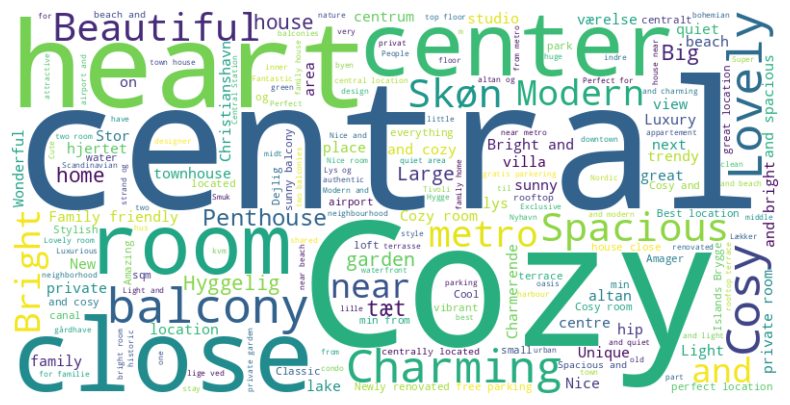

In [2]:
# pip install pandas
# pip install scikit-learn
import pandas as pd
import sklearn as sk

# load the data
data = pd.read_csv('listings.csv')

# filter relevant columns
data_limited = data[["id",
    "name",
    "host_id"  ,
    "host_name" , 
    "neighbourhood_cleansed"  ,
    "latitude"  ,
    "longitude"  ,
    "room_type"  ,
    "price"  ,
    "minimum_nights"  ,
    "number_of_reviews",  
    "last_review"  ,
    "review_scores_rating"  ,
    "review_scores_accuracy" , 
    "review_scores_cleanliness"  ,
    "review_scores_checkin"  ,
    "review_scores_communication"  ,
    "review_scores_location"  ,
    "review_scores_value"  ,
    "reviews_per_month"  ,
    "calculated_host_listings_count"  ,
    "availability_365",]]

# removing rows with no reviews

data_filtered = data_limited.loc[data_limited['number_of_reviews'] != 0]

# remove nan

data_filtered = data_filtered.dropna()
data_filtered.head()

# get a list of distinct values from neighbourhood_cleansed columns in data_filtered

neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# replace e.g. Nrrbro with Nørrebro in neighbourhood_cleansed column

data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Nrrebro", "Nørrebro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("sterbro", "Østerbro")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Vanlse", "Vanløse")
data_filtered["neighbourhood_cleansed"] = data_filtered["neighbourhood_cleansed"].replace("Brnshj-Husum", "Brønshøj-Husum")
neighbourhoods = data_filtered["neighbourhood_cleansed"].unique()

# Remove dollar signs and commas and convert to float - note the prices are actually in DKK
data_filtered['price'] = data_filtered['price'].replace('[\$,]', '', regex=True).astype(float)

# Calculate the median price
median_price = data_filtered['price'].median()

# Create a new column 'price_category' with 0 for 'affordable' and 1 for 'expensive'
data_filtered['price_category'] = (data_filtered['price'] > median_price).astype(int)

display(data_filtered.head())

# Describe the apartments using a wordcloud
# Remember to install packages
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine the two lists of stop words
stop_words = ['Østerbro', 'Copenhagen', 'København', 'in', 'bedroom', 'bedrooms', 'bed', 'beds', 'bath', 'baths', 'Frederiksberg', 'V', 'Ø', 'SV', 'S', 'N', 'K', 'C', 'W', 'kbh', 'Ballerup', 'Hellerup', 'Valby', 'Vanløse', 'Brønhøj', 'Nørrebro', 'Vesterbro', "CPH", "with", "to", "of", "a", "the", "på", "i", "med", "af", "at", "city", "by", "apartment", "appartment", "lejlighed", "flat", "m2", "apt"]

# Convert the 'name' column to a single string
text = ' '.join(data_filtered['name'].astype(str))

# Create and generate a word cloud image
wordcloud = WordCloud(stopwords=stop_words, background_color="white", width=800, height=400).generate(text)

# Display the generated word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Your tasks start here


### 1. Since data science is so much fun, provide a word cloud of the names of the hosts, removing any names of non-persons. Does this more or less correspond with the distribution of names according to [Danmarks Statistik](https://www.dst.dk/da/Statistik/emner/borgere/navne/navne-i-hele-befolkningen)?

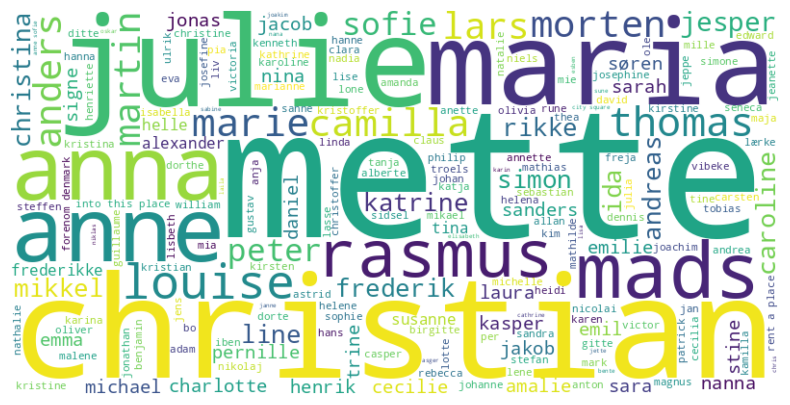

                  Host Name Frequency
0     ApartmentinCopenhagen       134
1                     Mette       131
2                 Christian       116
3                     Julie       107
4                     Maria       104
...                     ...       ...
3443                   Yoav         1
3444                   Mina         1
3445                   Eske         1
3446        Ditte Lundqvist         1
3447       Jonas & Prudence         1

[3448 rows x 2 columns]


In [3]:
from collections import Counter

host_names = data_filtered['host_name'].astype(str).str.strip().str.lower()

# Remove known business/non-person words
non_names = {
  'cph', 'dk', 'rental', 'rentals', 'apartments', 'apartment', 
  'bnb', 'management', 'service', 'host', 'hosting', 
  'superhost', 'booking', 'group', 'company', 'firma', 'lejlighed',
  'apartmentincopenhagen'
}
host_names = host_names[~host_names.isin(non_names)]

name_freq = Counter(host_names)
wordcloud = WordCloud(background_color="white", width=800, height=400).generate_from_frequencies(name_freq)

#Does not split up names like Jonas & Johhny will be counted as one. 

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

frequency_table = data_filtered['host_name'].value_counts().reset_index().astype(str)
frequency_table.columns = ['Host Name', 'Frequency']

print(frequency_table)


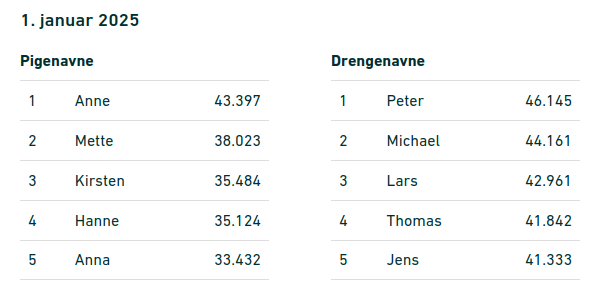

### 2. Using non-scaled versions of latitude and longitude, plot the listings data on a map.

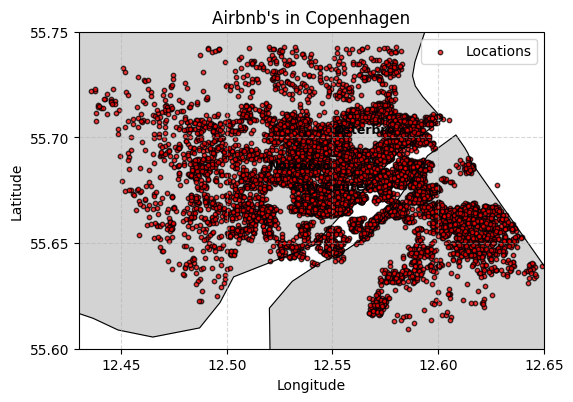

In [4]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

latitudes = data_filtered['latitude'].astype(float)
longitudes = data_filtered['longitude'].astype(float)

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([12.43, 12.65, 55.60, 55.75], crs=ccrs.PlateCarree())  

# Add land, borders, and coastlines
ax.add_feature(cfeature.LAND, color="lightgray")
ax.add_feature(cfeature.COASTLINE, linewidth=0.8)
ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.8)

# Plot custom latitude/longitude points
ax.scatter(longitudes, latitudes, color='red', marker='o', label='Locations', s=10, edgecolor='black', alpha=0.75)

districts = {'City Center': (55.675, 12.568), 'Østerbro': (55.702, 12.58), 'Nørrebro': (55.685, 12.55)}
for district, (lat, lon) in districts.items():
    ax.text(lon, lat, district, fontsize=9, fontweight='bold', ha='right', color='black')

# Add gridlines and labels for lat/lon
ax.set_xticks([12.45, 12.50, 12.55, 12.60, 12.65], crs=ccrs.PlateCarree())
ax.set_yticks([55.60, 55.65, 55.70, 55.75], crs=ccrs.PlateCarree())
ax.grid(True, linestyle='--', alpha=0.5)

ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")

ax.legend()
plt.title("Airbnb's in Copenhagen")
plt.show()

1. Visualizing Spatial Distribution
    
    It helps see where listings are clustered — e.g., city center vs. suburbs.

    You can spot overrepresented areas or data gaps.

2. Identifying Location-Based Trends
    
    Certain districts might correlate with higher prices, better reviews, or different room types.

3. Outlier Detection
    
    If a listing shows up far outside Copenhagen, it might be a data error or an unusual case.

4. Supports Feature Engineering
    
    You can use the location to create new features:

    Distance to city center

    Distance to popular neighborhoods

    Whether it's in a high-density zone

### 3. Create boxplots where you have the neighbourhood on the x-axis and price on the y-axis. What does this tell you about the listings in Copenhagen? Keep the x-axis as is and move different variables into the y-axis to see how things are distributed between the neighborhoods to create different plots (your choice).

/tmp/ipykernel_22331/2102302838.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([filtered_data[filtered_data['neighbourhood_cleansed'] == neighbourhood_cleansed]['price'] for neighbourhood_cleansed in classes], labels=classes)


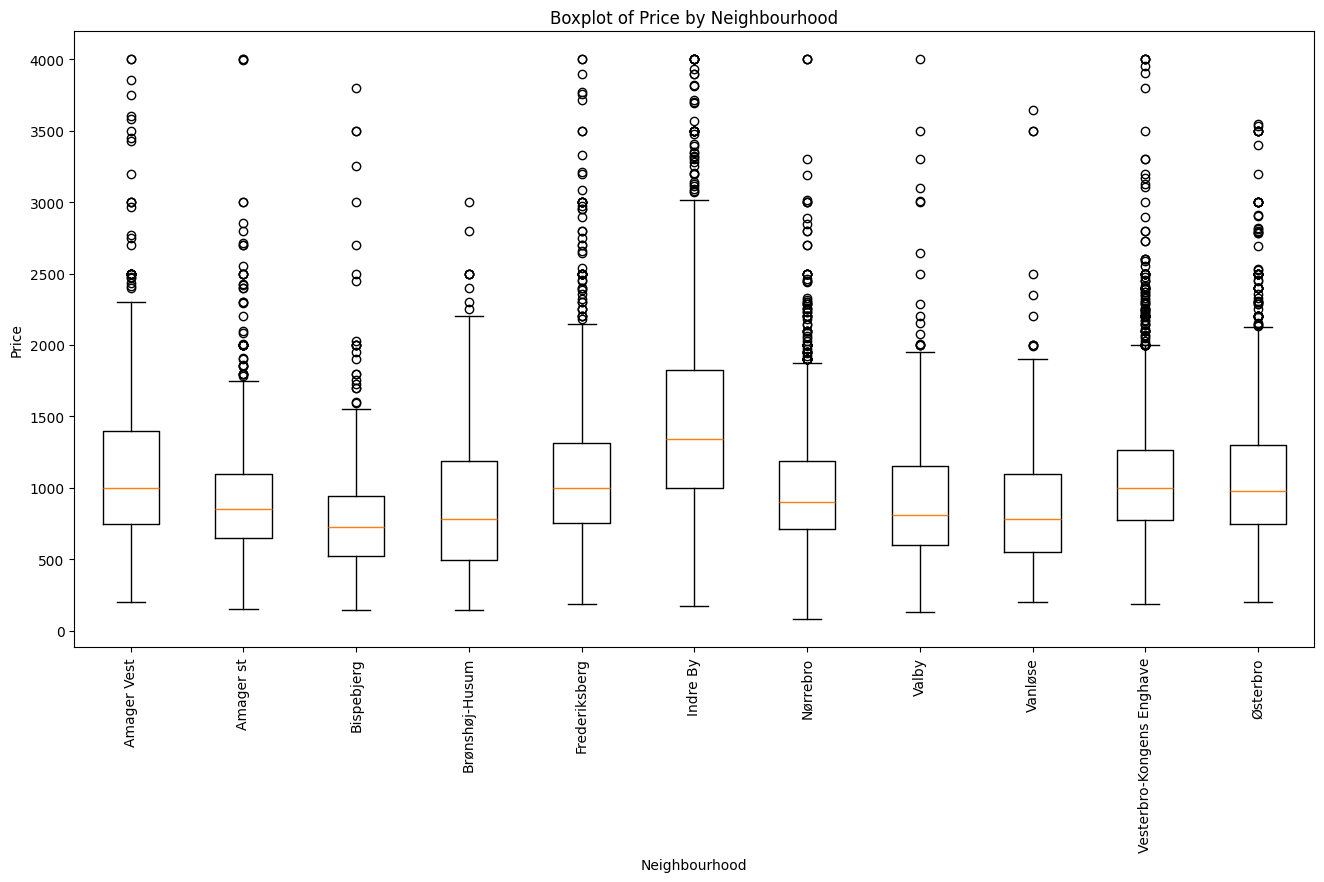

In [ ]:
import matplotlib.pyplot as plt

classes = sorted(data_filtered['neighbourhood_cleansed'].unique())

#Remove top 1% of values in all columns, so the y-axis does not get to the point where we can't see anything
numeric_cols = data_filtered.select_dtypes(include=['number'])
thresholds = numeric_cols.quantile(0.99)
filtered_data = data_filtered[(numeric_cols <= thresholds).all(axis=1)]

plt.figure(figsize=(16, 8))
plt.boxplot([filtered_data[filtered_data['neighbourhood_cleansed'] == neighbourhood_cleansed]['price'] for neighbourhood_cleansed in classes], labels=classes)
plt.xlabel('Neighbourhood')
plt.ylabel('Price')
plt.title('Boxplot of Price by Neighbourhood')
plt.xticks(rotation=90)
plt.show()

Indre By and Frederiksberg have the highest median prices, meahwhile Bispebjerg and Brønshøj-Husum are somewhat.
Prices are fairly spread across neighborhoods, but central areas are generally more expensive.
All neighborhoods have various high-price outliers, so we could assume that luxury listings are common.
Copenhagen’s housing market has a broad price range, with listings at both affordable and high-end levels.

/tmp/ipykernel_22331/1196070746.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([filtered_data[filtered_data['neighbourhood_cleansed'] == neighbourhood_cleansed]['review_scores_rating'] for neighbourhood_cleansed in classes], labels=classes)


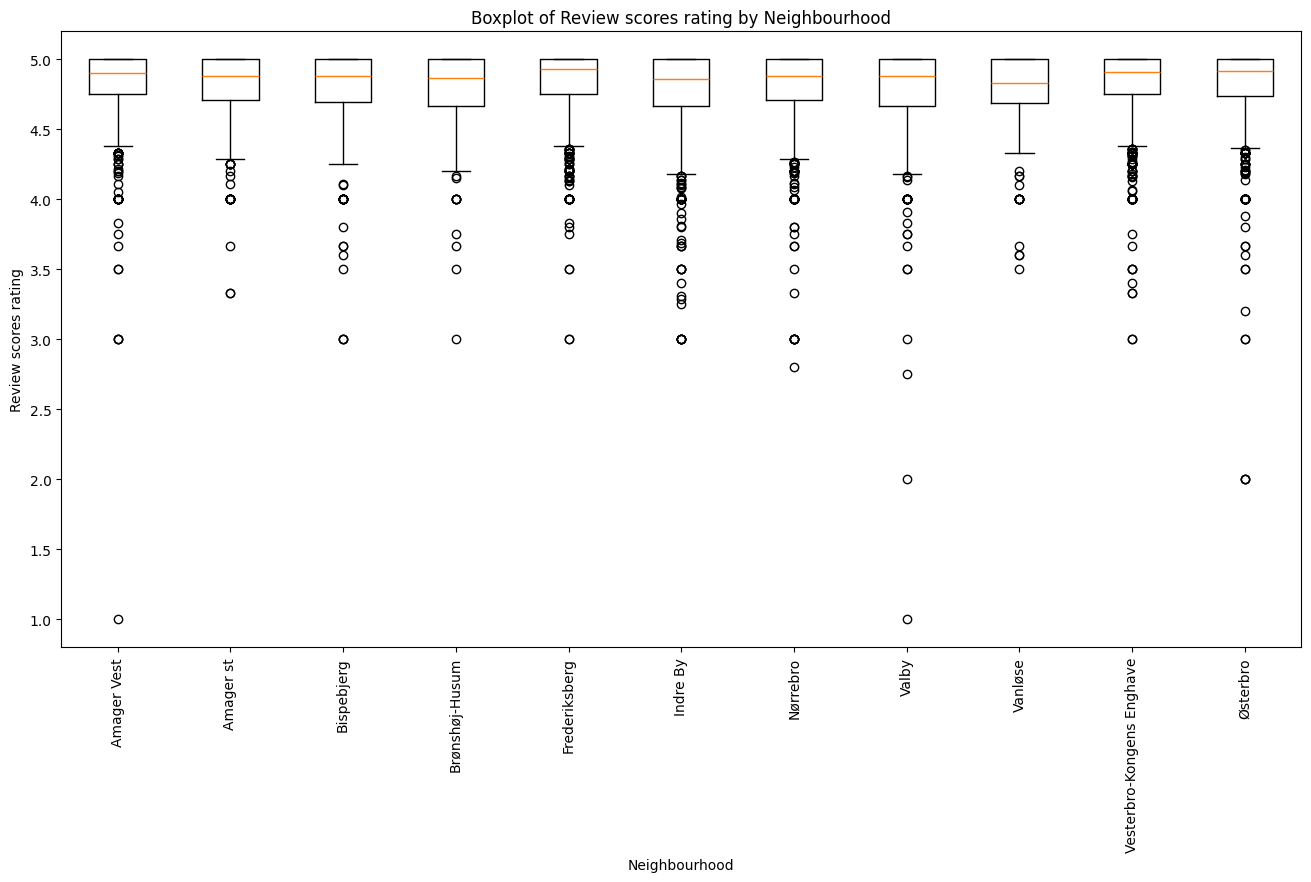

In [14]:
plt.figure(figsize=(16, 8))
plt.boxplot([filtered_data[filtered_data['neighbourhood_cleansed'] == neighbourhood_cleansed]['review_scores_rating'] for neighbourhood_cleansed in classes], labels=classes)
plt.xlabel('Neighbourhood')
plt.ylabel('Review scores rating')
plt.title('Boxplot of Review scores rating by Neighbourhood')
plt.xticks(rotation=90)
plt.show()

Review scores are generally high, mostly above 4.5.
A few outliers exist with very low ratings, but they are rare.
There is little variation between neighborhoods, suggesting consistently good experiences.

/tmp/ipykernel_22331/38018262.py:2: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([filtered_data[filtered_data['neighbourhood_cleansed'] == neighbourhood_cleansed]['minimum_nights'] for neighbourhood_cleansed in classes], labels=classes)


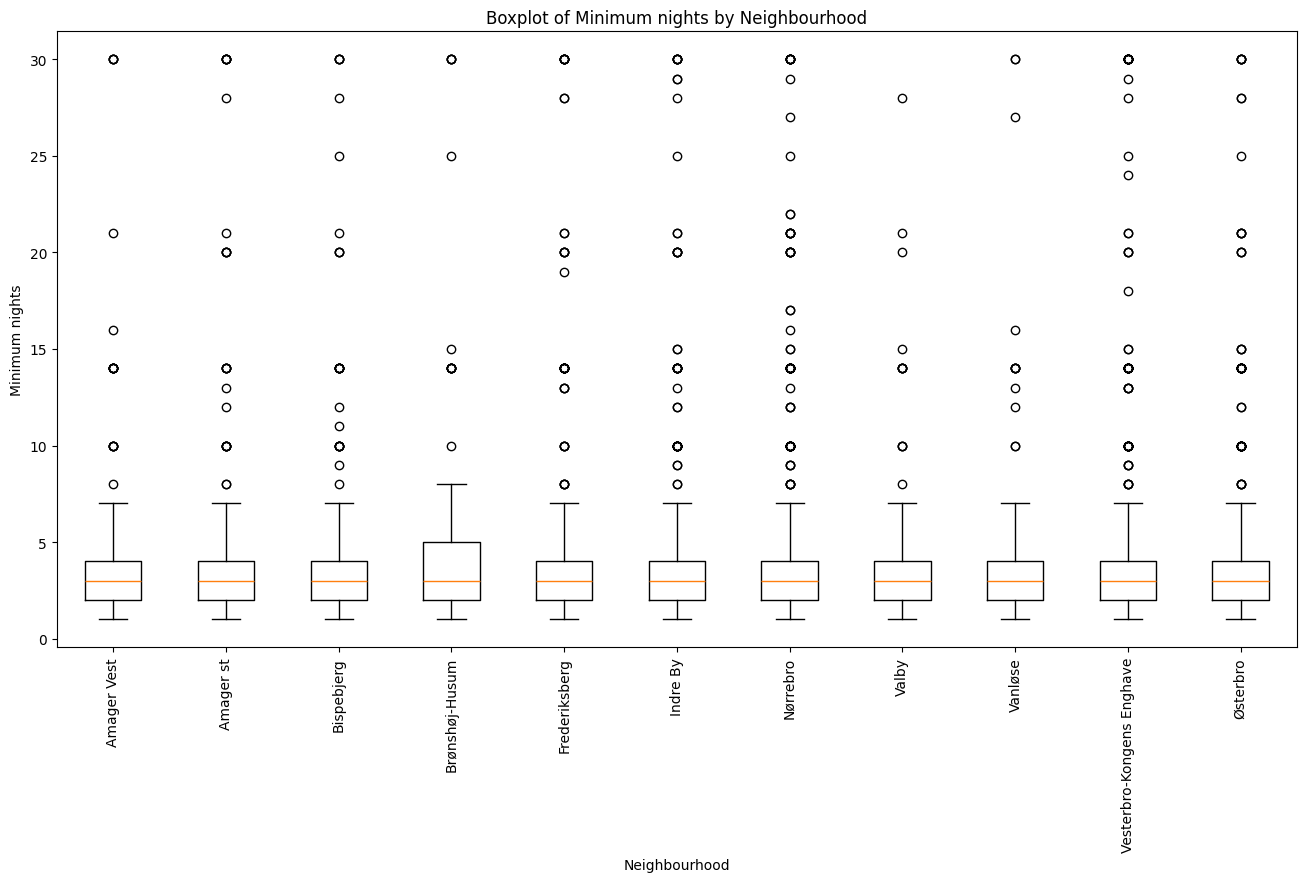

In [15]:
plt.figure(figsize=(16, 8))
plt.boxplot([filtered_data[filtered_data['neighbourhood_cleansed'] == neighbourhood_cleansed]['minimum_nights'] for neighbourhood_cleansed in classes], labels=classes)
plt.xlabel('Neighbourhood')
plt.ylabel('Minimum nights')
plt.title('Boxplot of Minimum nights by Neighbourhood')
plt.xticks(rotation=90)
plt.show()

The median minimum nights requirement is low (typically 2-3 nights).
Some listings have very high minimum nights (outliers above 20-30).
The distribution is quite similar across all neighborhoods.

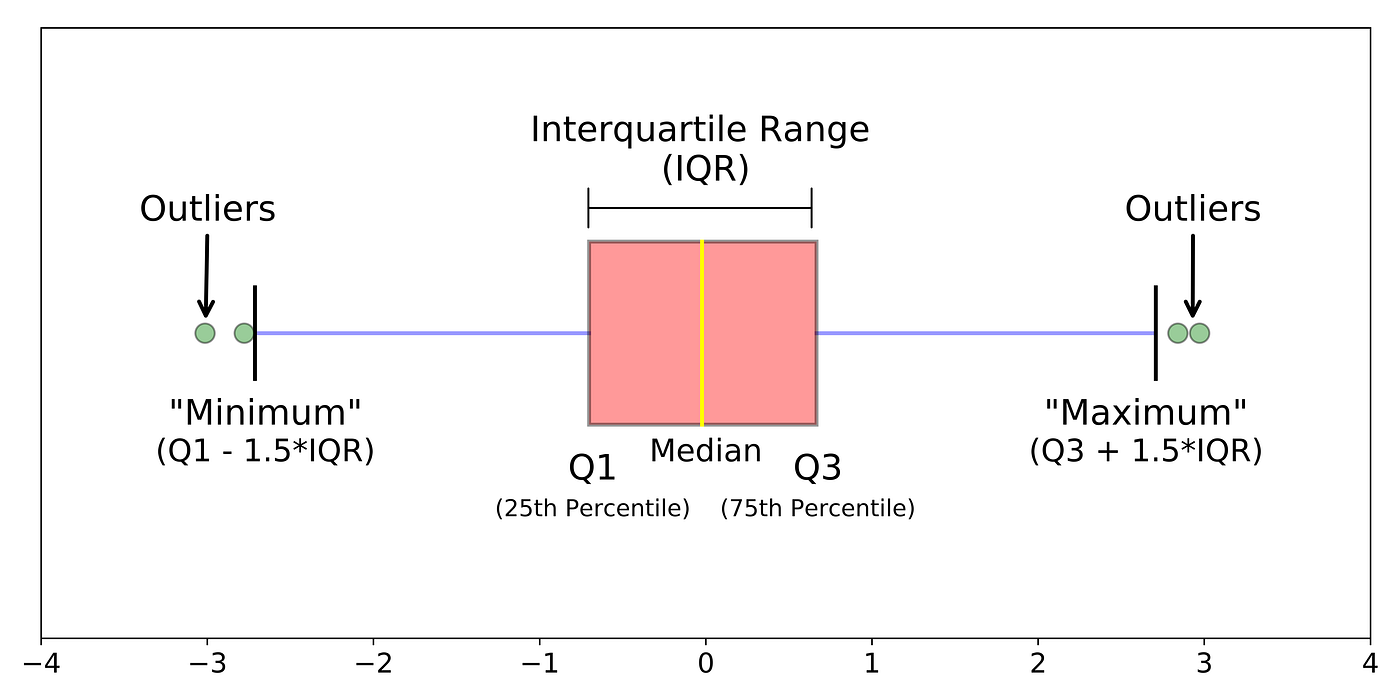

Data seems very skewed since the boxplot is far from being in the middle

Fix this by data binning, log or squareroot transformation

### 4. Do a descriptive analysis of the neighborhoods. Include information about room type in the analysis as well as one other self-chosen feature. The descriptive analysis should contain mean/average, mode, median, standard deviation/variance, minimum, maximum and quartiles.

In [8]:
from statistics import mode

analysis = data_filtered.groupby(['neighbourhood_cleansed'])

neighborhood_stats = analysis[['price']].describe()
neighborhood_stats = neighborhood_stats.round(2)

neighborhood_stats['price_median'] = analysis['price'].median()
neighborhood_stats['price_mode'] = analysis['price'].agg(lambda x: mode(x))
neighborhood_stats['room_type_mode'] = analysis['room_type'].agg(lambda x: mode(x))
neighborhood_stats['#unique_room_types'] = analysis['room_type'].nunique()

display(neighborhood_stats)

price                                           \
                            count     mean      std    min     25%     50%   
neighbourhood_cleansed                                                       
Amager Vest                1059.0  1205.75  2121.66  200.0  722.00  1000.0   
Amager st                   924.0  1019.86   704.77  135.0  650.00   851.0   
Bispebjerg                  604.0   912.07  1831.81  143.0  542.25   747.5   
Brønshøj-Husum              285.0   875.49   552.01  145.0  500.00   750.0   
Frederiksberg              1177.0  1216.68  1866.62  185.0  750.00  1000.0   
Indre By                   1844.0  1570.91  1065.98  165.0  995.00  1350.0   
Nørrebro                   2057.0  1014.79   609.39   79.0  720.00   900.0   
Valby                       539.0   932.14   622.84  127.0  600.00   800.0   
Vanløse                     298.0   874.54   502.56  200.0  536.75   750.5   
Vesterbro-Kongens Enghave  2034.0  1114.64   692.60  186.0  760.25   999.0   
Østerbro                   1305.0  1183.89  1385.24  200.0  750.00   979.0   

                                            price_median price_mode  \
                               75%      max                           
neighbourhood_cleansed                                                
Amager Vest                1400.00  64900.0       1000.0     1000.0   
Amager st                  1190.00  10000.0        851.0     1000.0   
Bispebjerg                  961.00  44000.0        747.5      700.0   
Brønshøj-Husum             1100.00   4462.0        750.0      500.0   
Frederiksberg              1339.00  58000.0       1000.0     1000.0   
Indre By                   1870.50  20000.0       1350.0     1200.0   
Nørrebro                   1199.00  12500.0        900.0     1000.0   
Valby                      1119.50   7429.0        800.0      700.0   
Vanløse                    1091.75   3643.0        750.5     1200.0   
Vesterbro-Kongens Enghave  1299.00  10800.0        999.0     1000.0   
Østerbro                   1331.00  41800.0        979.0     1000.0   

                            room_type_mode #unique_room_types  
                                                               
neighbourhood_cleansed                                         
Amager Vest                Entire home/apt                  3  
Amager st                  Entire home/apt                  4  
Bispebjerg                 Entire home/apt                  3  
Brønshøj-Husum             Entire home/apt                  3  
Frederiksberg              Entire home/apt                  2  
Indre By                   Entire home/apt                  4  
Nørrebro                   Entire home/apt                  3  
Valby                      Entire home/apt                  2  
Vanløse                    Entire home/apt                  2  
Vesterbro-Kongens Enghave  Entire home/apt                  3  
Østerbro                   Entire home/apt                  3

| Statistic                         | Description                                                                          |
| --------------------------------- | ------------------------------------------------------------------------------------ |
| **Mean (Average)**                | The sum of all values divided by the number of values.                               |
| **Mode**                          | The value that appears most frequently.                                              |
| **Median**                        | The middle value when the data is ordered (50th percentile).                         |
| **Standard Deviation / Variance** | Measures how spread out the values are from the mean.                                |
| **Minimum**                       | The smallest value in the dataset.                                                   |
| **Maximum**                       | The largest value in the dataset.                                                    |
| **Quartiles (Q1, Q2, Q3)**        | Divide the data into four equal parts: Q1 (25%), Q2 (50%, same as median), Q3 (75%). |


| Idea                                  | Why it helps                                                                |
| ------------------------------------- | --------------------------------------------------------------------------- |
| `log_price`                           | Reduces skew from extreme price values  (looking at mean vs max)            |
| `is_entire_home`                      | Captures dominant room type in a binary form (redudant room/type mode)      |
| `price_per_room_type`                 | More granular groupings, e.g., avg price per room type in each neighborhood |
| `price_relative_to_neighborhood_mean` | Contextual price comparisons                                                |
| `price_zscore_within_neighborhood`    | Normalizes within-group differences                                         |
| `price_bucket` (e.g., low, mid, high) | Converts continuous into categorical for tree models                        |


### 5. Based on self-chosen features, and with "price_category" as your target, develop a k-Nearest Neighbor model to determine whether a rental property should be classified as 0 or 1. Remember to divide your data into training data and test data. Comment on your findings.

In [12]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

labels = data_filtered["price_category"]

base_data = data_filtered.drop(['price_category'], axis='columns')
base_data = base_data.loc[:, ~base_data.columns.isin(base_data.select_dtypes(include=['object']).columns)]
base_data = base_data.drop(["id", "host_id"], axis='columns')
base_data = base_data.dropna()

data_with_price = base_data.copy()

X_train, X_test, y_train, y_test = train_test_split(data_with_price, labels, test_size=0.2, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy score (WITH price):", accuracy_score(y_test, y_pred))

data_without_price = base_data.drop(['price'], axis='columns')

X_train, X_test, y_train, y_test = train_test_split(data_without_price, labels, test_size=0.2, random_state=42)

model = KNeighborsClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy score (WITHOUT price):", accuracy_score(y_test, y_pred))


Accuracy score (WITH price): 0.9979389942291839
Accuracy score (WITHOUT price): 0.5754328112118714


### Hyperparameter tuning and model comparison

Try different k values using cross-validation

Compare to other models like logistic regression that is great for binary classification

### Standardization

k-NN uses distance, so features on different scales (e.g., "latitude" vs. "price") will skew results.

### Feature Selection

Use something like feature correlation matrix

Watch for multicollinearity (e.g., price and minimum_nights may be redundant or misleading).

### Performancs Matrics

To better see performance of this we could use a confusion matrix as well as a ROC curve

Another model to test up against would be logistic regressions with a sigmoid function

This model seems to be really accurate this makes sense as it has the actual price making it extremly easy to predict.